In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")


In [2]:
url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"
df = pd.read_csv(url)
df.head()


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN


In [3]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (520288, 61)

Columns:
 Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 't

In [4]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Columns of interest
columns_of_interest = [
    "date", "location", "total_cases", "new_cases",
    "total_deaths", "new_deaths", "total_vaccinations",
    "people_vaccinated", "people_fully_vaccinated",
    "population"
]
existing_columns = [col for col in columns_of_interest if col in df.columns]
df = df[existing_columns]

# Convert 'date' to datetime
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Drop rows with missing location
if "location" in df.columns:
    df = df.dropna(subset=["location"])

# Reset index
df = df.reset_index(drop=True)

print("✅ Data cleaned. Remaining columns:", df.columns.tolist())


✅ Data cleaned. Remaining columns: ['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'population']


In [5]:
possible_location_names = ["location", "country", "country_name"]
location_col = None
for col in possible_location_names:
    if col in df.columns:
        location_col = col
        break

countries = ["Kenya", "United States", "India"]

if location_col:
    df_countries = df[df[location_col].isin(countries)]
    print(f"✅ Filtered data for {len(countries)} countries. Remaining rows: {len(df_countries)}")
else:
    df_countries = df.copy()
    print("⚠️ No location column found, assuming single-country dataset.")


⚠️ No location column found, assuming single-country dataset.


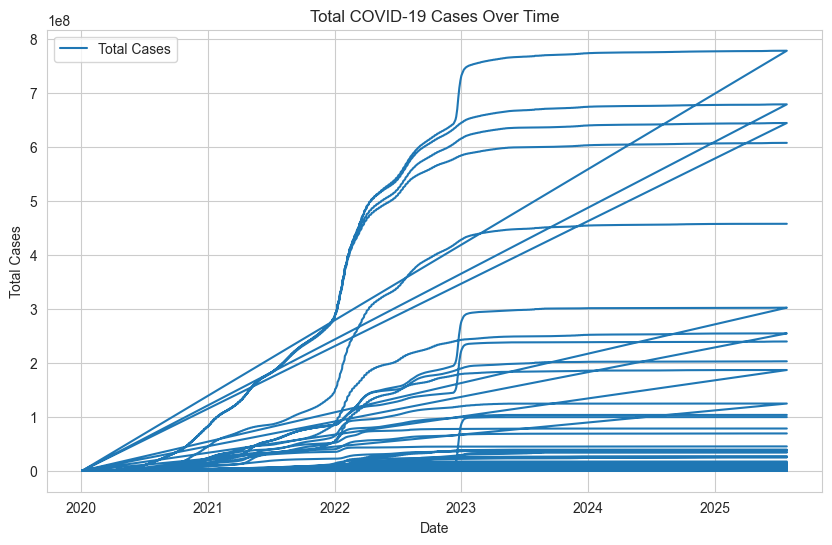

In [6]:
plt.figure(figsize=(10,6))
if location_col:
    for country in countries:
        subset = df_countries[df_countries[location_col] == country]
        plt.plot(subset["date"], subset["total_cases"], label=country)
else:
    plt.plot(df_countries["date"], df_countries["total_cases"], label="Total Cases")

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


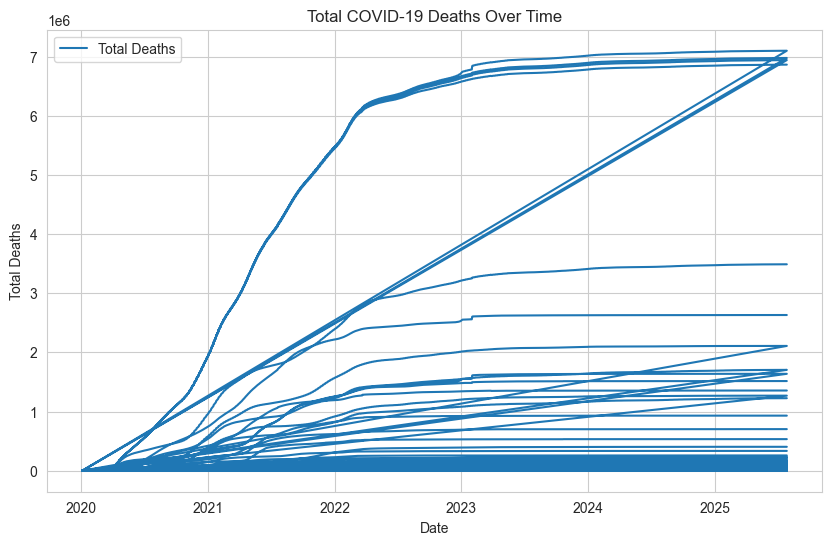

In [7]:
plt.figure(figsize=(10,6))
if location_col:
    for country in countries:
        subset = df_countries[df_countries[location_col] == country]
        plt.plot(subset["date"], subset["total_deaths"], label=country)
else:
    plt.plot(df_countries["date"], df_countries["total_deaths"], label="Total Deaths")

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()


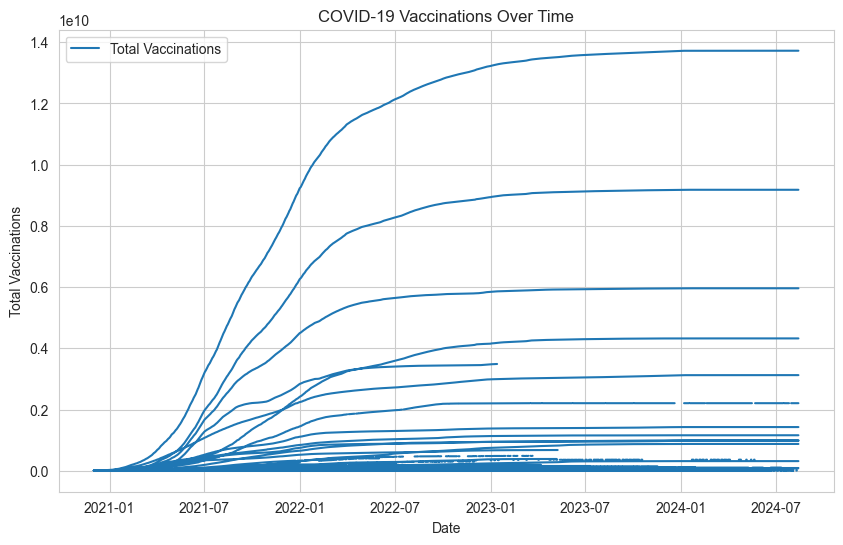

In [8]:
plt.figure(figsize=(10,6))
if location_col:
    for country in countries:
        subset = df_countries[df_countries[location_col] == country]
        plt.plot(subset["date"], subset["total_vaccinations"], label=country)
else:
    plt.plot(df_countries["date"], df_countries["total_vaccinations"], label="Total Vaccinations")

plt.title("COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.show()


In [9]:
latest_date = df["date"].max()
df_latest = df[df["date"] == latest_date]

fig = px.choropleth(
    df_latest,
    locations=location_col,
    locationmode="country names",
    color="total_cases",
    hover_name=location_col,
    color_continuous_scale="Reds",
    title=f"COVID-19 Total Cases by Country - {latest_date.date()}"
)
fig.show()


In [ ]:
# Make a copy to avoid SettingWithCopyWarning
df_latest = df[df["date"] == latest_date].copy()

# Calculate death rate
df_latest["death_rate"] = (df_latest["total_deaths"] / df_latest["total_cases"]) * 100

# Display top 5 countries by death rate
if location_col:
    top_death_rate = df_latest.sort_values(by="death_rate", ascending=False)[[location_col, "death_rate"]].head()
    print("Top 5 countries by death rate:\n", top_death_rate)
else:
    print("⚠️ No location column found; cannot display death rates by country.")


C:\Users\HP\AppData\Local\Temp\ipykernel_19860\3402792134.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyError: '[None] not in index'